In [1]:
import numpy as np 
import cv2
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
fpath = glob('./data/female/*.jpg')
mpath = glob('./data/male/*.jpg')


In [3]:
print('El número de imagenes de Mujer en la carpeta es=',len(fpath))
print('El número de imagenes de Hombres en la carpeta es=',len(mpath))

El número de imagenes de Mujer en la carpeta es= 4762
El número de imagenes de Hombres en la carpeta es= 5399


[[ 55  33 182 182]]


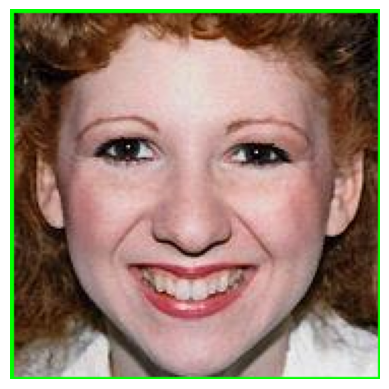

In [4]:
img = cv2.imread(fpath[0])
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

haar = cv2.CascadeClassifier('./haarcascade_frontalcatface.xml')
gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
faces_list = haar.detectMultiScale(gray,1.5,5)
print(faces_list)
for x,y,w,h in faces_list:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)
    roi= img_rgb[y:y+h,x:x+w]
    
    plt.imshow(roi)
    plt.axis('off')
    plt.show()

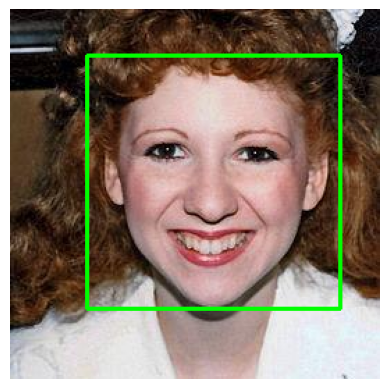

In [5]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [6]:
for i in range(len(fpath)):
    try:
        img = cv2.imread(fpath[i])
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
        faces_list = haar.detectMultiScale(gray,1.5,5)
        for x,y,w,h in faces_list:
            roi = img[y:y+h,x:x+w]
            cv2.imwrite(f'./crop_data/female/female_{i}.jpg',roi)
            print('Se recortaron todas las imagenes de mujeres')
    except:
        print('El proceso de recorte tuvo un error')

Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes de mujeres
Se recortaron todas las imagenes

In [7]:
for i in range(len(mpath)):
    try:
        img = cv2.imread(mpath[i])
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
        faces_list = haar.detectMultiScale(gray,1.5,5)
        for x,y,w,h in faces_list:
            roi = img[y:y+h,x:x+w]
            cv2.imwrite(f'./crop_data/male/male_{i}.jpg',roi)
            print('Se recortaron todas las imagenes de hombres')
    except:
        print('El proceso de recorte tuvo un error')

Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes de hombres
Se recortaron todas las imagenes

In [8]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [9]:
def structuring(path):
    try:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        size = gray.shape[0]
        if size >= 100:
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except:
        return None

In [10]:
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [11]:
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis=0)

df['dimension'] = df['filepath'].apply(get_size)

df_filter = df.query('dimension > 60')
df_filter.shape
df_filter['data'] = df_filter['filepath'].apply(structuring)

data = df_filter['data'].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]

data = data/255.0 
data['gender'] = df_filter['gender']

In [12]:
data.isnull().sum().sum()
data.dropna(inplace=True)
pickle.dump(data,open('./data/data_images_100_100.pickle',mode='wb'))

In [13]:
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb'))
X = data.drop('gender',axis=1).values

mean_face = X.mean(axis=0)

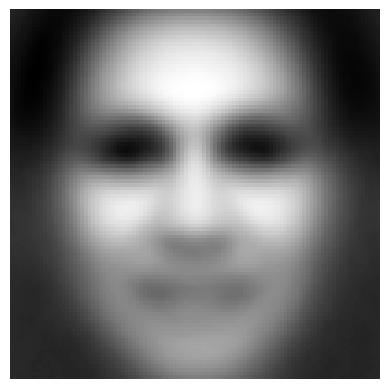

In [14]:
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

In [15]:
X_t = X - mean_face

In [16]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [17]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

In [18]:
exp_var_df.set_index('principal_components',inplace=True)

In [19]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [20]:
y = data['gender'].values
np.savez('./data/data_pca_50_target',pca_data,y)
pca_dict = {'pca':pca_50,'mean_face':mean_face}
pickle.dump(pca_dict,open('../model/pca_dict.pickle','wb'))

In [21]:
pca_data_inv = pca_50.inverse_transform(pca_data)
eig_img = pca_data_inv[0,:].reshape((100,100))

(-0.5, 99.5, 99.5, -0.5)

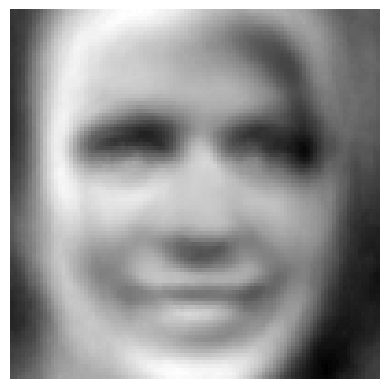

In [22]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

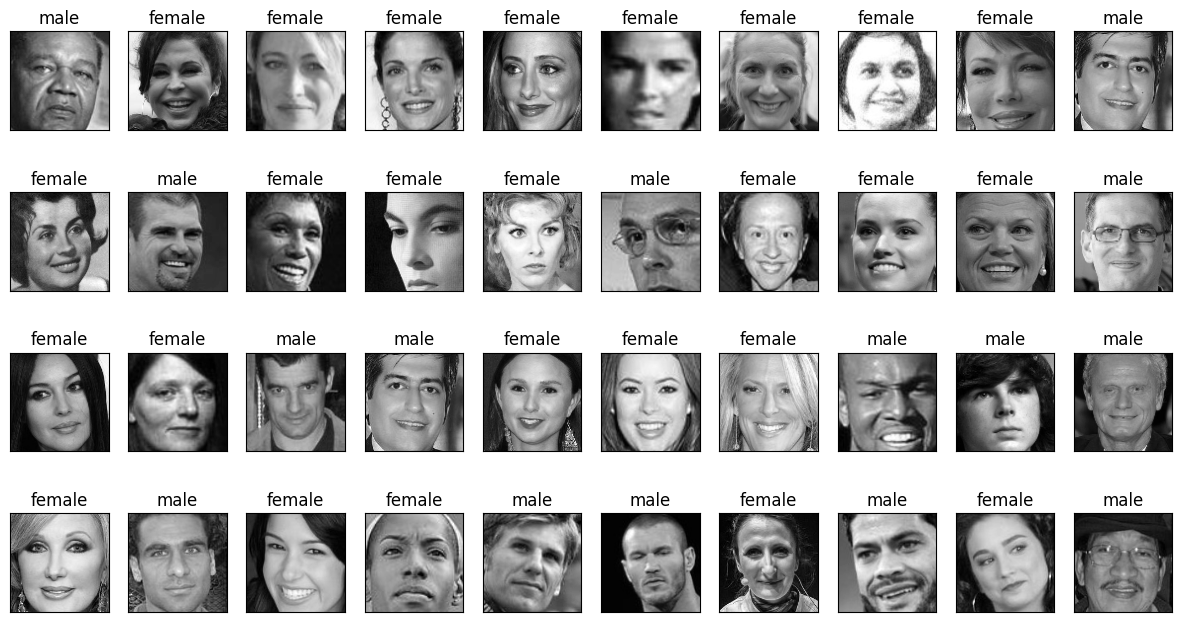

====================Valores propios de las imagenes====================


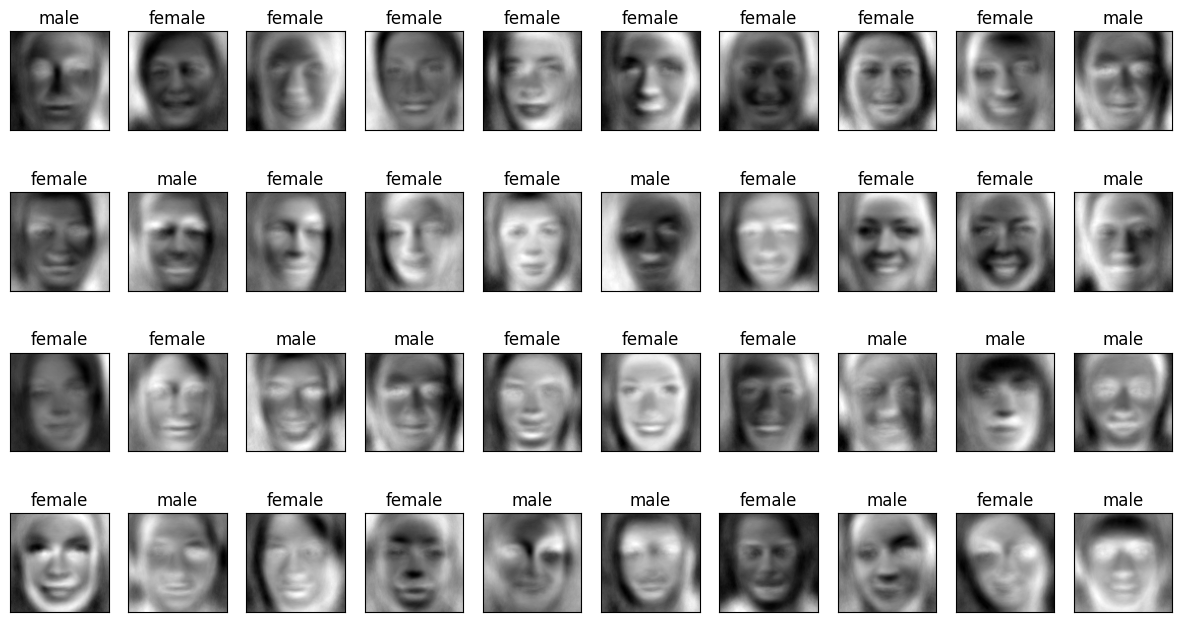

In [23]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Valores propios de las imagenes'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [24]:
data = np.load('./data/data_pca_50_target.npz')

data.allow_pickle = True

X = data['arr_0']
y = data['arr_1']

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [25]:
model_svc = SVC(probability=True)

param_grid = {'C':[0.5,1,10,20,30,50],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1]}

In [26]:
model_grid = GridSearchCV(model_svc,
                          param_grid=param_grid,
                          scoring='accuracy',cv=3,verbose=2)

In [27]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   0.6s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   0.6s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   0.6s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   0.5s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   0.5s
[CV] END ............C=0.5, coef0=0, gamma=0.0

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 20, 30, 50], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [28]:
model_final = model_grid.best_estimator_
model_final.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.005,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
y_pred = model_final.predict(x_test)

cr = metrics.classification_report(y_test,y_pred,output_dict=True)

metrics.roc_auc_score(np.where(y_test=="male",1,0),
                      np.where(y_pred=="male",1,0))

0.7949393008629516

In [30]:
pickle.dump(model_final,open('../model/model_svm.pickle',mode='wb'))

In [31]:
haar = cv2.CascadeClassifier('../model/haarcascade_frontalcatface.xml')
model_svm =  pickle.load(open('../model/model_svm.pickle',mode='rb'))
pca_models = pickle.load(open('../model/pca_dict.pickle',mode='rb'))

In [32]:
model_pca = pca_models['pca']
mean_face_arr = pca_models['mean_face']

In [33]:
img = cv2.imread('./data/getty_test.jpg')
gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
faces = haar.detectMultiScale(gray,1.5,3)
predictions = []
for x,y,w,h in faces:
    roi = gray[y:y+h,x:x+w]
    roi = roi / 255.0
    if roi.shape[1] > 100:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
    else:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
    roi_reshape = roi_resize.reshape(1,10000)
    roi_mean = roi_reshape - mean_face_arr
    eigen_image = model_pca.transform(roi_mean)
    eig_img = model_pca.inverse_transform(eigen_image)
    results = model_svm.predict(eigen_image)
    prob_score = model_svm.predict_proba(eigen_image)
    prob_score_max = prob_score.max()
    text = "%s : %d"%(results[0],prob_score_max*100)
    if results[0] == 'male':
        color = (255,255,0)
    else:
        color = (255,0,255)
        
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color,-1)
    cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_PLAIN,3,(255,255,255),5)
    output = {
        'roi':roi,
        'eig_img': eig_img,
        'prediction_name':results[0],
        'score':prob_score_max
    }
    
    predictions.append(output)

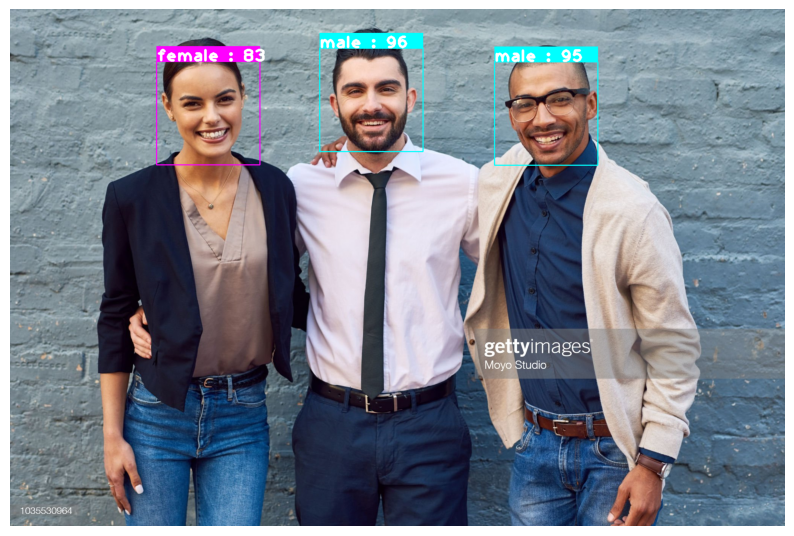

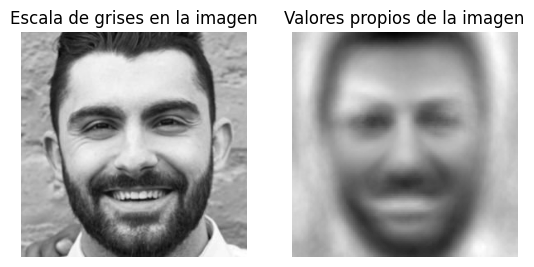

Predicción del genero = male
Puntaje de la predicción = 96.40 %
----------------------------------------------------------------------------------------------------


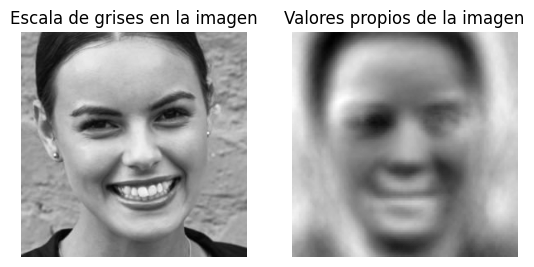

Predicción del genero = female
Puntaje de la predicción = 83.28 %
----------------------------------------------------------------------------------------------------


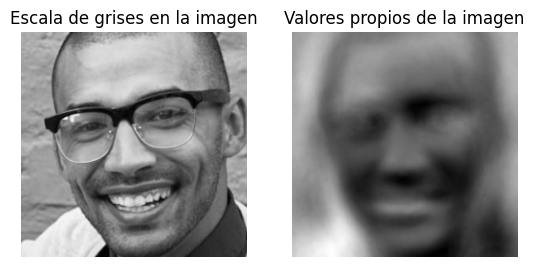

Predicción del genero = male
Puntaje de la predicción = 95.59 %
----------------------------------------------------------------------------------------------------


In [34]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

for i in range(len(predictions)):
    obj_gray = predictions[i]['roi']
    obj_eig = predictions[i]['eig_img'].reshape(100,100)
    plt.subplot(1,2,1)
    plt.imshow(obj_gray,cmap='gray')
    plt.title('Escala de grises en la imagen')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig,cmap='gray')
    plt.title('Valores propios de la imagen')
    plt.axis('off')
    
    plt.show()
    print('Predicción del genero =',predictions[i]['prediction_name'])
    print('Puntaje de la predicción = {:,.2f} %'.format(predictions[i]['score']*100))
    
    print('-'*100)